# With source 

Preliminary Results using F1 Score

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import time

#nltk & gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

#sklearn
from sklearn.metrics import f1_score, fbeta_score, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

In [55]:
data = pd.read_csv("news_w2v.csv", index_col = 0, converters={'tokenized_title': eval, 'tokenized_text': eval})
print("DATA LOADED")

results = {
    "title": {
        "nb": {
            "default": {
                "time": 0,
                "f1": 0
            }, 
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "svm": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "knn": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "logreg": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "dectree": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "extratrees": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "adb": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "rf": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        }
    },
    "text": {
        "nb": {
            "default": {
                "time": 0,
                "f1": 0
            }, 
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "svm": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "knn": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "logreg": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "dectree": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "extratrees": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "adb": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "rf": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        }
    }
}

DATA LOADED


In [4]:
### MODELING BASED ON TITLE

# Train Test Split Function
def split_train_test(data, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(data[['tokenized_title']], 
                                                        data['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=7)
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_train_test(data)


In [ ]:
w2v_model_title = Word2Vec(pd.Series(data['tokenized_title']).values, min_count = 1, size = 1000, workers = 4, sg = 1)

w2v_model_title.save("word2vec_text.model")

In [5]:
w2v_model_title = Word2Vec.load("word2vec_title.model")

In [6]:
print(w2v_model_title.most_similar('terrorist'))

[('terror', 0.8988322019577026), ('organization', 0.8600435256958008), ('extremist', 0.8581781387329102), ('domestic', 0.8511384725570679), ('community', 0.8464694619178772), ('terrorism', 0.846422553062439), ('militia', 0.8460522890090942), ('horrific', 0.845471978187561), ('mosque', 0.8413844108581543), ('incident', 0.8357979655265808)]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# saving the word embeddings into csv file
with open("train_title_word2vec.csv", 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model_title[token] for token in row['tokenized_title']], axis=0)).tolist()
        
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
            
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [7]:
word2vec_title_df = pd.read_csv("train_title_word2vec.csv")

In [8]:
def extract(w2v_model_title, X_test):
    test_features_word2vec = []
    
    for index, row in X_test.iterrows():
        model_vector = np.mean([w2v_model_title[token] for token in row['tokenized_title']], axis=0).tolist()
        if type(model_vector) is list:
            test_features_word2vec.append(model_vector)
        else:
            test_features_word2vec.append(np.array([0 for i in range(1000)]))
    return test_features_word2vec


X_test = extract(w2v_model_title, X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [32]:
## MultiNomial Naive Bayes Model
### default
nb = GaussianNB()

start = time.time()
nb.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = nb.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['nb']['default']['time'] = time_taken
results['title']['nb']['default']['f1'] = f1

plot_confusion_matrix(nb, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("nb_cm_title_w2v.png")

print("NB TITLE FINISH")

NB TITLE FINISH


In [37]:
## SVM
### default
svm = LinearSVC()

start = time.time()
svm.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = svm.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['svm']['default']['time'] = time_taken
results['title']['svm']['default']['f1'] = f1

print("SVM DEFAULT FINISH")

### GridSearchCV
svm = LinearSVC(max_iter = 4000)

param_grid = {'C': np.linspace(0.1,1)}

svm_title_w2v = GridSearchCV(svm, param_grid, cv = 5, scoring = 'f1', n_jobs = -1)

start = time.time()
svm_title_w2v.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = svm_title_w2v.predict(X_test)

svm_f1_title_w2v = f1_score(y_test['label'], y_pred)

results['title']['svm']['tuned']['time'] = time_taken
results['title']['svm']['tuned']['f1'] = svm_f1_title_w2v
results['title']['svm']['tuned']['params'] = svm_title_w2v.best_params_

print("SVM TUNING FINISH")

SVM TUNING FINISH


In [41]:
## knn
### default
knn = KNeighborsClassifier(n_jobs=-1)

start = time.time()
knn.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = knn.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['knn']['default']['time'] = time_taken
results['title']['knn']['default']['f1'] = f1

KNN TUNING FINISH


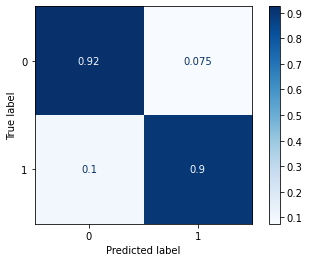

In [44]:
### GridSearchCV
knn = KNeighborsClassifier(n_jobs=-1)

param_grid = {'n_neighbors': np.arange(1,50,5)}

knn_title_w2v = GridSearchCV(knn, param_grid, cv = 5, scoring = 'f1')

start = time.time()
knn_title_w2v.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = knn_title_w2v.predict(X_test)

knn_f1_title_w2v = f1_score(y_test['label'], y_pred)

results['title']['knn']['tuned']['time'] = time_taken
results['title']['knn']['tuned']['f1'] = knn_f1_title_w2v
results['title']['knn']['tuned']['params'] = knn_title_w2v.best_params_

plot_confusion_matrix(knn_title_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("knn_cm_title_w2v.png")

print("KNN TUNING FINISH")

LOGREG DEFAULT FINISH


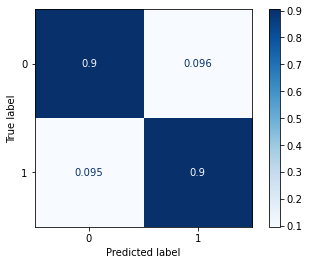

In [38]:
## Logistic Regression
### default
logreg = LogisticRegression(max_iter = 4000, C = results['text']['lr'])

start = time.time()
logreg.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = logreg.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['logreg']['default']['time'] = time_taken
results['title']['logreg']['default']['f1'] = f1

plot_confusion_matrix(logreg, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("logreg_cm_title_w2v.png")

print("LOGREG DEFAULT FINISH")

LOGREG TUNING FINISH


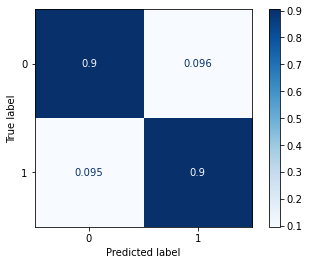

In [30]:
### GridSearchCV
logreg = LogisticRegression(max_iter = 4000)

param_grid = {'C': np.linspace(0.1,1)}

logreg_title_w2v = GridSearchCV(logreg, param_grid, cv = 5, scoring='f1')

start = time.time()
logreg_title_w2v.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = logreg_title_w2v.predict(X_test)

lr_f1_title_w2v = f1_score(y_test['label'], y_pred)

results['title']['logreg']['tuned']['time'] = time_taken
results['title']['logreg']['tuned']['f1'] = lr_f1_title_w2v
results['title']['logreg']['tuned']['params'] = logreg_title_w2v.best_params_

plot_confusion_matrix(logreg_title_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("logreg_cm_title_w2v.png")

print("LOGREG TUNING FINISH")

In [17]:
## Decision Tree
### default
decision_tree = DecisionTreeClassifier(random_state = 7)

start = time.time()
decision_tree.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = decision_tree.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['dectree']['default']['time'] = time_taken
results['title']['dectree']['default']['f1'] = f1

print("DECTREE DEFAULT FINISH")

DECTREE DEFAULT FINISH


DECTREE TUNING FINISH


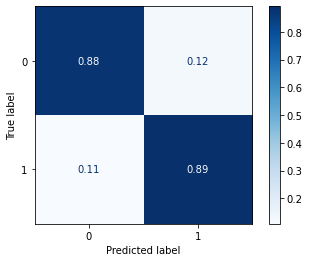

In [10]:
### GridSearchCV
decision_tree = DecisionTreeClassifier(random_state = 7, criterion='entropy')

param_grid = {'max_depth':np.arange(1,800, 100),
              'max_features':np.arange(1,1000, 100),
              'min_samples_leaf':np.arange(1,50,5)}

dectree_title_w2v = GridSearchCV(decision_tree, param_grid, cv = 5, scoring='f1', n_jobs = -1)

start = time.time()
dectree_title_w2v.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = dectree_title_w2v.predict(X_test)

dectree_f1_title_w2v = f1_score(y_test['label'], y_pred)

results['title']['dectree']['tuned']['time'] = time_taken
results['title']['dectree']['tuned']['f1'] = dectree_f1_title_w2v
results['title']['dectree']['tuned']['params'] = dectree_title_w2v.best_params_

plot_confusion_matrix(dectree_title_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("dectree_cm_title_w2v.png")

print("DECTREE TUNING FINISH")

In [14]:
## Extra trees
### default
extra_trees = ExtraTreesClassifier(random_state = 7)

start = time.time()
extra_trees.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = extra_trees.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['extratrees']['default']['time'] = time_taken
results['title']['extratrees']['default']['f1'] = f1

print("EXTRA TREES DEFAULT FINISH")

EXTRA TREES DEFAULT FINISH


EXTRA TREES TUNING FINISH


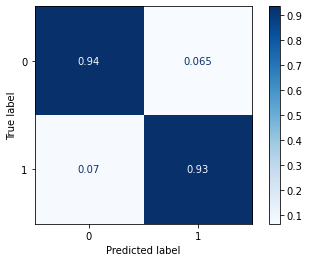

In [15]:
### GridSearchCV
extra_trees = ExtraTreesClassifier(random_state = 7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

extratrees_title_w2v = GridSearchCV(extra_trees, param_grid, cv = 5, scoring='f1', n_jobs = 10)

start = time.time()
extratrees_title_w2v.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = extratrees_title_w2v.predict(X_test)

extratrees_f1_title_w2v = f1_score(y_test['label'], y_pred)

results['title']['extratrees']['tuned']['time'] = time_taken
results['title']['extratrees']['tuned']['f1'] = extratrees_f1_title_w2v
results['title']['extratrees']['tuned']['params'] = extratrees_title_w2v.best_params_

plot_confusion_matrix(extratrees_title_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("extratrees_cm_title_w2v.png")

print("EXTRA TREES TUNING FINISH")

In [18]:
## Adaboost
### default
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

start = time.time()
adaboost.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = adaboost.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['adb']['default']['time'] = time_taken
results['title']['adb']['default']['f1'] = f1

print("ADABOOST DEFAULT FINISH")

ADABOOST DEFAULT FINISH


ADABOOST TUNING FINISH


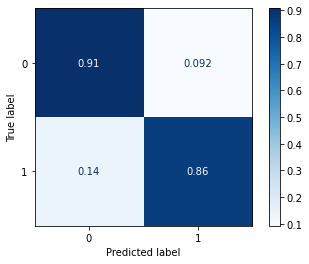

In [18]:
### GridSearchCV
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

adaboost_title_w2v = GridSearchCV(adaboost, param_grid, cv = 5, scoring='f1', n_jobs = 10)

start = time.time()
adaboost_title_w2v.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = adaboost_title_w2v.predict(X_test)

adaboost_f1_title_w2v = f1_score(y_test['label'], y_pred)

results['title']['adb']['tuned']['time'] = time_taken
results['title']['adb']['tuned']['f1'] = adaboost_f1_title_w2v
results['title']['adb']['tuned']['params'] = adaboost_title_w2v.best_params_

plot_confusion_matrix(adaboost_title_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("adb_cm_title_w2v.png")

print("ADABOOST TUNING FINISH")

In [21]:
## Random forests
### default
random_forests = RandomForestClassifier(random_state=7)

start = time.time()
random_forests.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = random_forests.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['title']['rf']['default']['time'] = time_taken
results['title']['rf']['default']['f1'] = f1

print("RANDOM FORESTS DEFAULT FINISH")

RANDOM FORESTS DEFAULT FINISH


RANDOM FORESTS TUNING FINISH


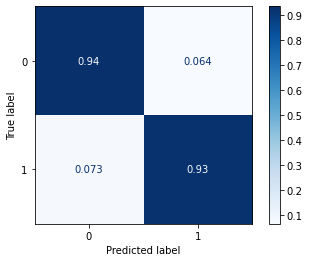

In [21]:
### GridSearchCV
random_forests = RandomForestClassifier(random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

rf_title_w2v = GridSearchCV(random_forests, param_grid, cv = 5, scoring='f1', n_jobs = 10)

start = time.time()
rf_title_w2v.fit(word2vec_title_df, y_train['label'])
time_taken = time.time() - start

y_pred = rf_title_w2v.predict(X_test)

rf_f1_title_w2v = f1_score(y_test['label'], y_pred)

results['title']['rf']['tuned']['time'] = time_taken
results['title']['rf']['tuned']['f1'] = rf_f1_title_w2v
results['title']['rf']['tuned']['params'] = rf_title_w2v.best_params_

plot_confusion_matrix(rf_title_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("rf_cm_title_w2v.png")

print("RANDOM FORESTS TUNING FINISH")

In [31]:
### MODELING BASED ON TEXT

# Train Test Split Function
def split_train_test(data, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(data[['tokenized_text']], 
                                                        data['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=7)
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_train_test(data)

In [35]:
w2v_model_text = Word2Vec(pd.Series(data['tokenized_text']).values, min_count = 1, size = 1000, workers = 4, sg = 1)

w2v_model_text.save("word2vec_text.model")

In [27]:
w2v_model_text = Word2Vec.load("word2vec_text.model")

In [33]:
# saving the word embeddings into csv file
with open("train_text_word2vec.csv", 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model_text[token] for token in row['tokenized_text']], axis=0)).tolist()
        
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
            
        word2vec_file.write(line1)
        word2vec_file.write('\n')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
# Load the vectors
word2vec_text_df = pd.read_csv("train_text_word2vec.csv")

In [35]:
def extract(w2v_model_text, X_test):
    test_features_word2vec = []
    
    for index, row in X_test.iterrows():
        model_vector = np.mean([w2v_model_text[token] for token in row['tokenized_text']], axis=0).tolist()
        if type(model_vector) is list:
            test_features_word2vec.append(model_vector)
        else:
            test_features_word2vec.append(np.array([0 for i in range(1000)]))
    return test_features_word2vec


X_test = extract(w2v_model_text, X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


NB FINISH


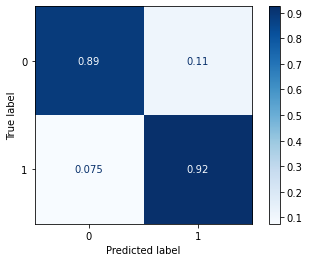

In [6]:
## MultiNomial Naive Bayes Model
### default
nb = GaussianNB()

start = time.time()
nb.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = nb.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['nb']['default']['time'] = time_taken
results['text']['nb']['default']['f1'] = f1

plot_confusion_matrix(nb, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("nb_cm_text_w2v.png")

print("NB FINISH")

In [7]:
## knn
### default
knn = KNeighborsClassifier(n_jobs=-1)

start = time.time()
knn.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = knn.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['knn']['default']['time'] = time_taken
results['text']['knn']['default']['f1'] = f1

print("KNN DEFAULT FINISH")

KNN DEFAULT FINISH


In [ ]:
### GridSearchCV
knn = KNeighborsClassifier(n_jobs=-1)

param_grid = {'n_neighbors': np.arange(1,50,5)}

knn_text_w2v = GridSearchCV(knn, param_grid, cv = 5, scoring = 'f1')

start = time.time()
knn_text_w2v.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = knn_text_w2v.predict(X_test)

knn_f1_text_w2v = f1_score(y_test['label'], y_pred)

results['text']['knn']['tuned']['time'] = time_taken
results['text']['knn']['tuned']['f1'] = knn_f1_text_w2v
results['text']['knn']['tuned']['params'] = knn_text_w2v.best_params_

plot_confusion_matrix(knn_text_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("knn_cm_text_w2v.png")
print("KNN TUNING FINISH")

In [10]:
## SVM
### default
svm = LinearSVC(max_iter = 4000)

start = time.time()
svm.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = svm.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['svm']['default']['time'] = time_taken
results['text']['svm']['default']['f1'] = f1

print("SVM DEFAULT FINISH")

SVM DEFAULT FINISH


SVM TUNING FINISH


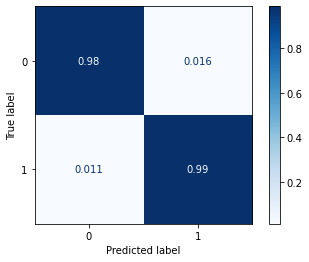

In [11]:
### GridSearchCV
svm = LinearSVC(max_iter = 4000)

param_grid = {'C': np.linspace(0.1,1)}

svm_text_w2v = GridSearchCV(svm, param_grid, cv = 5, scoring = 'f1')

start = time.time()
svm_text_w2v.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = svm_text_w2v.predict(X_test)

svm_f1_text_w2v = f1_score(y_test['label'], y_pred)

results['text']['svm']['tuned']['time'] = time_taken
results['text']['svm']['tuned']['f1'] = svm_f1_text_w2v
results['text']['svm']['tuned']['params'] = svm_text_w2v.best_params_

plot_confusion_matrix(svm_text_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("svm_cm_text_w2v.png")

print("SVM TUNING FINISH")

LOGREG DEFAULT FINISH


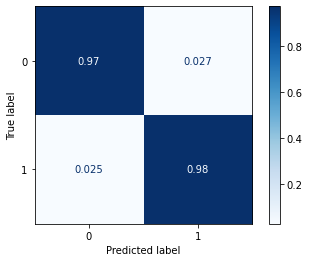

In [9]:
## Logistic Regression
### default
logreg = LogisticRegression(max_iter = 4000)

start = time.time()
logreg.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = logreg.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['logreg']['default']['time'] = time_taken
results['text']['logreg']['default']['f1'] = f1

plot_confusion_matrix(logreg, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("logreg_cm_text_w2v.png")

print("LOGREG DEFAULT FINISH")

LOGREG TUNING FINISH


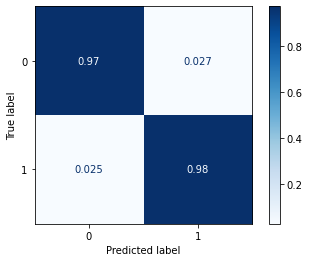

In [19]:
### GridSearchCV
logreg = LogisticRegression(max_iter = 4000)

param_grid = {'C': np.linspace(0.1,1)}

logreg_text_w2v = GridSearchCV(logreg, param_grid, cv = 5, scoring='f1')

start = time.time()
logreg_text_w2v.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = logreg_text_w2v.predict(X_test)

lr_f1_text_w2v = f1_score(y_test['label'], y_pred)

results['text']['logreg']['tuned']['time'] = time_taken
results['text']['logreg']['tuned']['f1'] = lr_f1_text_w2v
results['text']['logreg']['tuned']['params'] = logreg_text_w2v.best_params_

plot_confusion_matrix(logreg_text_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("logreg_cm_text_w2v.png")

print("LOGREG TUNING FINISH")

In [8]:
## Decision Tree
### default
decision_tree = DecisionTreeClassifier(random_state = 7)

start = time.time()
decision_tree.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = decision_tree.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['dectree']['default']['time'] = time_taken
results['text']['dectree']['default']['f1'] = f1

print("DECTREE DEFAULT FINISH")

DECTREE DEFAULT FINISH


DECTREE TUNING FINISH


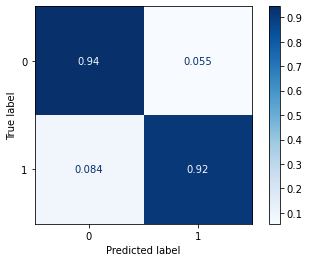

In [25]:
### GridSearchCV
decision_tree = DecisionTreeClassifier(random_state = 7, criterion='entropy')

param_grid = {'max_depth':np.arange(1,500, 100),
              'max_features':np.arange(1,1000, 100),
              'min_samples_leaf':np.arange(1,50,5)}

dectree_text_w2v = GridSearchCV(decision_tree, param_grid, cv = 5, scoring='f1', n_jobs = -1)

start = time.time()
dectree_text_w2v.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = dectree_text_w2v.predict(X_test)

dectree_f1_text_w2v = f1_score(y_test['label'], y_pred)

results['text']['dectree']['tuned']['time'] = time_taken
results['text']['dectree']['tuned']['f1'] = dectree_f1_text_w2v
results['text']['dectree']['tuned']['params'] = dectree_text_w2v.best_params_

plot_confusion_matrix(dectree_text_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("dectree_cm_text_w2v.png")

print("DECTREE TUNING FINISH")

In [9]:
## Extra trees
### default
extra_trees = ExtraTreesClassifier(random_state = 7)

start = time.time()
extra_trees.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = extra_trees.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['extratrees']['default']['time'] = time_taken
results['text']['extratrees']['default']['f1'] = f1

print("EXTRA TREES DEFAULT FINISH")

EXTRA TREES DEFAULT FINISH


EXTRA TREES TUNING FINISH


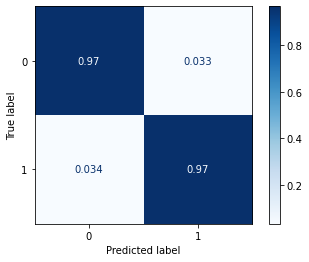

In [36]:
### GridSearchCV
extra_trees = ExtraTreesClassifier(random_state = 7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

extratrees_text_w2v = GridSearchCV(extra_trees, param_grid, cv = 5, scoring='f1', n_jobs = 14)

start = time.time()
extratrees_text_w2v.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = extratrees_text_w2v.predict(X_test)

extratrees_f1_text_w2v = f1_score(y_test['label'], y_pred)

results['text']['extratrees']['tuned']['time'] = time_taken
results['text']['extratrees']['tuned']['f1'] = extratrees_f1_text_w2v
results['text']['extratrees']['tuned']['params'] = extratrees_text_w2v.best_params_

plot_confusion_matrix(extratrees_text_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("extratrees_cm_text_w2v.png")

print("EXTRA TREES TUNING FINISH")

In [ ]:
## Adaboost
### default
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

start = time.time()
adaboost.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = adaboost.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['adb']['default']['time'] = time_taken
results['text']['adb']['default']['f1'] = f1

print("ADB DEFAULT FINISH")

ADB TUNING FINISH


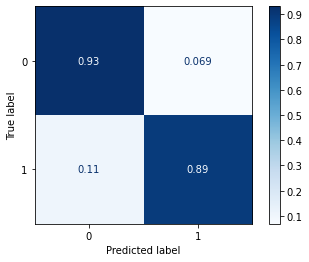

In [38]:
### GridSearchCV
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

adaboost_text_w2v = GridSearchCV(adaboost, param_grid, cv = 5, scoring='f1', n_jobs=14)

start = time.time()
adaboost_text_w2v.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = adaboost_text_w2v.predict(X_test)

adaboost_f1_text_w2v = f1_score(y_test['label'], y_pred)

results['text']['adb']['tuned']['time'] = time_taken
results['text']['adb']['tuned']['f1'] = adaboost_f1_text_w2v
results['text']['adb']['tuned']['params'] = adaboost_text_w2v.best_params_

plot_confusion_matrix(adaboost_text_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("adaboost_cm_text_w2v.png")

print("ADB TUNING FINISH")

In [16]:
## Random forests
### default
random_forests = RandomForestClassifier(random_state=7)

start = time.time()
random_forests.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = random_forests.predict(X_test)

f1 = f1_score(y_test['label'], y_pred)

results['text']['rf']['default']['time'] = time_taken
results['text']['rf']['default']['f1'] = f1

print("RANDOM FORESTS DEFAULT FINISH")

RANDOM FORESTS DEFAULT FINISH


In [40]:
### GridSearchCV
random_forests = RandomForestClassifier(random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

rf_text_w2v = GridSearchCV(random_forests, param_grid, cv = 5, scoring='f1', n_jobs = 14)

start = time.time()
rf_text_w2v.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = rf_text_w2v.predict(X_test)

rf_f1_text_w2v = f1_score(y_test['label'], y_pred)

results['text']['rf']['tuned']['time'] = time_taken
results['text']['rf']['tuned']['f1'] = rf_f1_text_w2v
results['text']['rf']['tuned']['params'] = rf_text_w2v.best_params_

plot_confusion_matrix(rf_text_w2v, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)
plt.savefig("rf_cm_text_w2v.png")

print("RANDOM FORESTS TUNING FINISH")

KeyboardInterrupt: 

In [3]:
results = np.load("w2v_results.npy", allow_pickle = True).tolist()

In [41]:
results

{'title': {'nb': {'default': {'time': 0.693305253982544,
    'f1': 0.8635032220269478},
   'tuned': {'time': 0, 'f1': 0, 'params': 0}},
  'svm': {'default': {'time': 13.703838586807251, 'f1': 0.9087951667247589},
   'tuned': {'time': 1811.5794024467468,
    'f1': 0.9087951667247589,
    'params': {'C': 1.0}}},
  'knn': {'default': {'time': 5.832834005355835, 'f1': 0.9064051051760814},
   'tuned': {'time': 1740.5446367263794,
    'f1': 0.9081234480312167,
    'params': {'n_neighbors': 11}}},
  'logreg': {'default': {'time': 3.4530136585235596, 'f1': 0.9011655011655012},
   'tuned': {'time': 0, 'f1': 0, 'params': 0}},
  'dectree': {'default': {'time': 118.57320713996887,
    'f1': 0.8796759590183464},
   'tuned': {'time': 8048.371073484421,
    'f1': 0.882175925925926,
    'params': {'max_depth': 101,
     'max_features': 601,
     'min_samples_leaf': 41}}},
  'extratrees': {'default': {'time': 22.137936115264893,
    'f1': 0.9298512706405901},
   'tuned': {'time': 666.2681078910828,
   

In [42]:
np.save("w2v_results.npy", results)

Preliminary results with F-beta score

In [27]:
results = {
        "nb": {
            "default": {
                "time": 0,
                "f1": 0
            }, 
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "svm": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "knn": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "logreg": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "dectree": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "extratrees": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "adb": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "rf": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        }
    }

In [28]:
### MODELING BASED ON TEXT

# Train Test Split Function
def split_train_test(data, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(data[['tokenized_text']], 
                                                        data['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=7)
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_train_test(data)

In [29]:
w2v_model_text = Word2Vec.load("word2vec_text.model")

In [30]:
# Load the vectors
word2vec_text_df = pd.read_csv("train_text_word2vec.csv")

In [31]:
X_test = extract(w2v_model_text, X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


NB FINISH


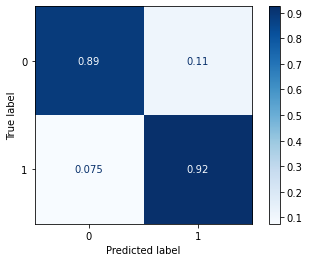

In [32]:
## Naive Bayes Model
### default
nb = GaussianNB()

start = time.time()
nb.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = nb.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta=0.5)

results['nb']['default']['time'] = time_taken
results['nb']['default']['f1'] = f1

plot_confusion_matrix(nb, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)

print("NB FINISH")

KNN DEFAULT FINISH


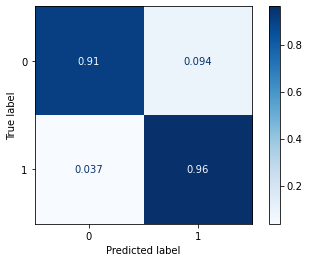

In [34]:
## knn
### default
knn = KNeighborsClassifier(n_jobs=-1)

start = time.time()
knn.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = knn.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

results['knn']['default']['time'] = time_taken
results['knn']['default']['f1'] = f1

plot_confusion_matrix(knn, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("KNN DEFAULT FINISH")

SVM DEFAULT FINISH


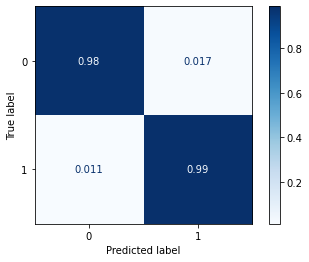

In [36]:
## SVM
### default
svm = LinearSVC(max_iter = 4000)

start = time.time()
svm.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = svm.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

results['svm']['default']['time'] = time_taken
results['svm']['default']['f1'] = f1

plot_confusion_matrix(svm, X_test, y_test['label'], normalize = "true", cmap = "Blues")
print("SVM DEFAULT FINISH")

LOGREG DEFAULT FINISH


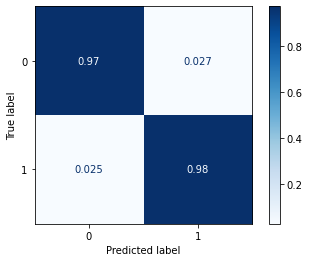

In [37]:
## Logistic Regression
### default
logreg = LogisticRegression(max_iter = 4000)

start = time.time()
logreg.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = logreg.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

results['logreg']['default']['time'] = time_taken
tresults['logreg']['default']['f1'] = f1

plot_confusion_matrix(logreg, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)

print("LOGREG DEFAULT FINISH")

DECTREE DEFAULT FINISH


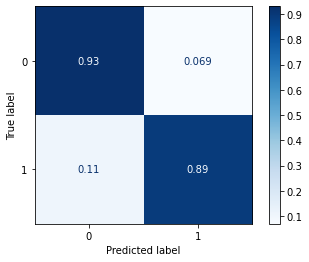

In [43]:
## Decision Tree
### default
decision_tree = DecisionTreeClassifier(random_state = 7)

start = time.time()
decision_tree.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = decision_tree.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

results['dectree']['default']['time'] = time_taken
results['dectree']['default']['f1'] = f1

plot_confusion_matrix(decision_tree, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("DECTREE DEFAULT FINISH")

EXTRA TREES DEFAULT FINISH


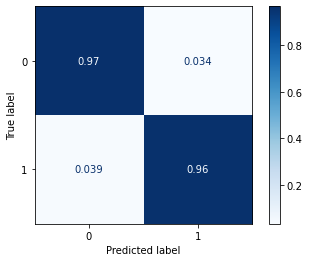

In [45]:
## Extra trees
### default
extra_trees = ExtraTreesClassifier(random_state = 7)

start = time.time()
extra_trees.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = extra_trees.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

results['extratrees']['default']['time'] = time_taken
results['extratrees']['default']['f1'] = f1

plot_confusion_matrix(extra_trees, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("EXTRA TREES DEFAULT FINISH")

ADB DEFAULT FINISH


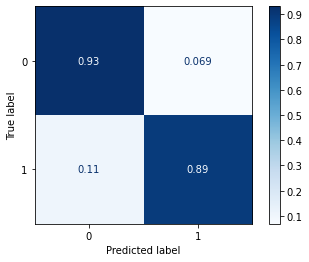

In [47]:
## Adaboost
### default
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

start = time.time()
adaboost.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = adaboost.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

results['adb']['default']['time'] = time_taken
results['adb']['default']['f1'] = f1

plot_confusion_matrix(adaboost, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("ADB DEFAULT FINISH")

RANDOM FORESTS DEFAULT FINISH


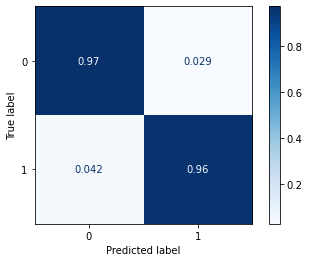

In [49]:
## Random forests
### default
random_forests = RandomForestClassifier(random_state=7)

start = time.time()
random_forests.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = random_forests.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

results['rf']['default']['time'] = time_taken
results['rf']['default']['f1'] = f1

plot_confusion_matrix(random_forests, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("RANDOM FORESTS DEFAULT FINISH")

In [50]:
np.

{'nb': {'default': {'time': 0.7012639045715332, 'f1': 0.8927199602331782},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'svm': {'default': {'time': 5.013109922409058, 'f1': 0.9837095648126599},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'knn': {'default': {'time': 4.6891188621521, 'f1': 0.916032233649437},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'logreg': {'default': {'time': 1.407344102859497, 'f1': 0.9717882956400093},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'dectree': {'default': {'time': 77.72504377365112, 'f1': 0.9170557935782024},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'extratrees': {'default': {'time': 19.996556520462036,
   'f1': 0.9629542790152404},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'adb': {'default': {'time': 76.23625874519348, 'f1': 0.9172324136934855},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'rf': {'default': {'time': 106.831951379776, 'f1': 0.9665076290802589},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}}}

In [51]:
np.save("full_fbeta.npy", results)

# Without source

In [59]:
data = pd.read_csv("SR_combined.csv")

In [5]:
sr_results = {
        "nb": {
            "default": {
                "time": 0,
                "f1": 0
            }, 
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "svm": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "knn": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "logreg": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "dectree": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "extratrees": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "adb": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "rf": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        }
    }

In [7]:
data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in data['text']] 

In [8]:
### MODELING BASED ON TEXT

# Train Test Split Function
def split_train_test(data, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(data[['tokenized_text']], 
                                                        data['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=7)
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_train_test(data)

In [8]:
w2v_model_text = Word2Vec(pd.Series(data['tokenized_text']).values, min_count = 1, size = 1000, workers = 10, sg = 1)

w2v_model_text.save("word2vec_sr.model")

In [9]:
w2v_model_text = Word2Vec.load("word2vec_sr.model")

In [10]:
# saving the word embeddings into csv file
with open("sr_train_txt_word2vec.csv", 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model_text[token] for token in row['tokenized_text']], axis=0)).tolist()
        
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
            
        word2vec_file.write(line1)
        word2vec_file.write('\n')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [10]:
word2vec_text_df = pd.read_csv("sr_train_txt_word2vec.csv")

In [11]:
with_source = pd.read_csv("news_w2v.csv", index_col = 0, converters={'tokenized_title': eval, 'tokenized_text': eval})
print("DATA LOADED")

DATA LOADED


In [13]:
X_tr,X_test,y_tr,y_test = split_train_test(with_source)

In [14]:
def extract(w2v_model_text, X_test):
    test_features_word2vec = []
    
    for index, row in X_test.iterrows():
        final_tokens = []
        
        for tok in row['tokenized_text']:
            if tok in w2v_model_text.wv.vocab:
                final_tokens.append(w2v_model_text[tok])
            
        model_vector = np.mean(final_tokens, axis=0).tolist()
        
        if type(model_vector) is list:
            test_features_word2vec.append(model_vector)
        else:
            test_features_word2vec.append(np.array([0 for i in range(1000)]))
    return test_features_word2vec


X_test = extract(w2v_model_text, X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


NB FINISH


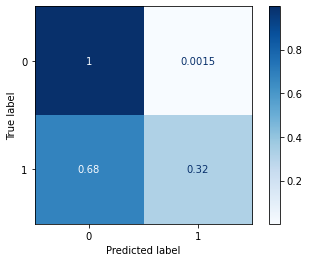

In [16]:
## MultiNomial Naive Bayes Model
### default
nb = GaussianNB()

start = time.time()
nb.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = nb.predict(X_test)

f1= fbeta_score(y_test['label'], y_pred, beta =  0.5)

sr_results['nb']['default']['time'] = time_taken
sr_results['nb']['default']['f1'] = f1

plot_confusion_matrix(nb, X_test, y_test['label'], normalize = "true", cmap = "Blues")
print("NB FINISH")

KNN DEFAULT FINISH


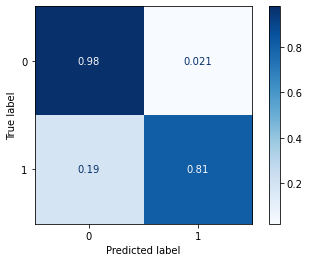

In [19]:
## knn
### default
knn = KNeighborsClassifier(n_jobs=-1)

start = time.time()
knn.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = knn.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

sr_results['knn']['default']['time'] = time_taken
sr_results['knn']['default']['f1'] = f1

plot_confusion_matrix(knn, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("KNN DEFAULT FINISH")

SVM DEFAULT FINISH


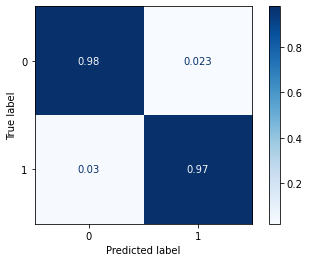

In [23]:
## SVM
### default
svm = LinearSVC(max_iter = 4000)

start = time.time()
svm.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = svm.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

sr_results['svm']['default']['time'] = time_taken
sr_results['svm']['default']['f1'] = f1

plot_confusion_matrix(svm, X_test, y_test['label'], normalize = "true", cmap = "Blues")
print("SVM DEFAULT FINISH")

LOGREG DEFAULT FINISH


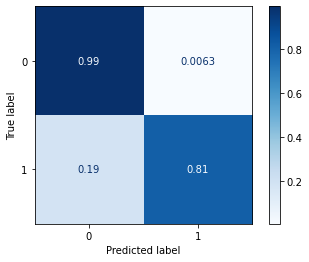

In [27]:
## Logistic Regression
### default
logreg = LogisticRegression(max_iter = 4000)

start = time.time()
logreg.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = logreg.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

sr_results['logreg']['default']['time'] = time_taken
sr_results['logreg']['default']['f1'] = f1

plot_confusion_matrix(logreg, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)

print("LOGREG DEFAULT FINISH")

DECTREE DEFAULT FINISH


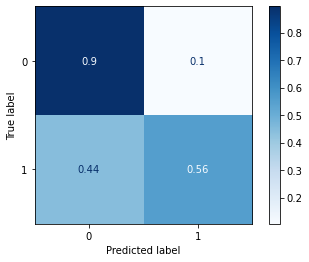

In [30]:
## Decision Tree
### default
decision_tree = DecisionTreeClassifier(random_state = 7)

start = time.time()
decision_tree.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = decision_tree.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

sr_results['dectree']['default']['time'] = time_taken
sr_results['dectree']['default']['f1'] = f1

plot_confusion_matrix(decision_tree, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("DECTREE DEFAULT FINISH")

EXTRA TREES DEFAULT FINISH


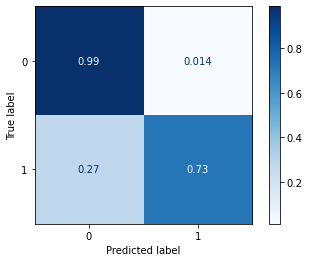

In [32]:
## Extra trees
### default
extra_trees = ExtraTreesClassifier(random_state = 7)

start = time.time()
extra_trees.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = extra_trees.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

sr_results['extratrees']['default']['time'] = time_taken
sr_results['extratrees']['default']['f1'] = f1

plot_confusion_matrix(extra_trees, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("EXTRA TREES DEFAULT FINISH")

ADB DEFAULT FINISH


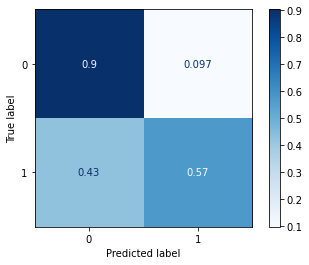

In [34]:
## Adaboost
### default
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

start = time.time()
adaboost.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = adaboost.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

sr_results['adb']['default']['time'] = time_taken
sr_results['adb']['default']['f1'] = f1

plot_confusion_matrix(adaboost, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("ADB DEFAULT FINISH")

RANDOM FORESTS DEFAULT FINISH


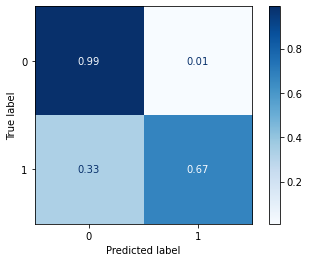

In [39]:
## Random forests
### default
random_forests = RandomForestClassifier(random_state=7)

start = time.time()
random_forests.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = random_forests.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

sr_results['rf']['default']['time'] = time_taken
sr_results['rf']['default']['f1'] = f1

plot_confusion_matrix(random_forests, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("RANDOM FORESTS DEFAULT FINISH")

In [41]:
np.save("sr_results.npy", sr_results)

# Without source and truncated

In [43]:
trunc_data = pd.read_csv("truncated.csv")

In [44]:
trunc_results = {
    "nb": {
            "default": {
                "time": 0,
                "f1": 0
            }, 
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "svm": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "knn": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "logreg": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "dectree": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "extratrees": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "adb": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        },
        "rf": {
            "default": {
                "time":0,
                "f1": 0
            },
            "tuned": {
                "time": 0,
                "f1": 0,
                "params": 0
            }
        }
    }

In [45]:
trunc_data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in trunc_data['text']] 

In [46]:
### MODELING BASED ON TEXT

# Train Test Split Function
def split_train_test(data, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(data[['tokenized_text']], 
                                                        data['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=7)
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_train_test(trunc_data)

In [77]:
w2v_model_text = Word2Vec(pd.Series(trunc_data['tokenized_text']).values, min_count = 1, size = 1000, workers = 10, sg = 1)

w2v_model_text.save("word2vec_trunc.model")

In [47]:
w2v_model_text = Word2Vec.load("word2vec_trunc.model")

In [78]:
# saving the word embeddings into csv file
with open("trunc_train_txt_word2vec.csv", 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model_text[token] for token in row['tokenized_text']], axis=0)).tolist()
        
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
            
        word2vec_file.write(line1)
        word2vec_file.write('\n')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [48]:
word2vec_text_df = pd.read_csv("trunc_train_txt_word2vec.csv")

In [49]:
default_df = pd.read_csv("news_w2v.csv", index_col = 0, converters={'tokenized_title': eval, 'tokenized_text': eval})
print("DATA LOADED")

DATA LOADED


In [50]:
X_tr,X_test,y_tr,y_test = split_train_test(default_df)

In [51]:
def extract(w2v_model_text, X_test):
    test_features_word2vec = []
    
    for index, row in X_test.iterrows():
        final_tokens = []
        
        for tok in row['tokenized_text']:
            if tok in w2v_model_text.wv.vocab:
                final_tokens.append(w2v_model_text[tok])
            
        model_vector = np.mean(final_tokens, axis=0).tolist()
        
        if type(model_vector) is list:
            test_features_word2vec.append(model_vector)
        else:
            test_features_word2vec.append(np.array([0 for i in range(1000)]))
    return test_features_word2vec


X_test = extract(w2v_model_text, X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


NB FINISH


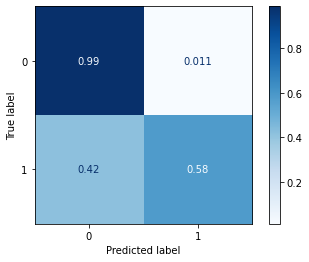

In [53]:
## MultiNomial Naive Bayes Model
### default
nb = GaussianNB()

start = time.time()
nb.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = nb.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['nb']['default']['time'] = time_taken
trunc_results['nb']['default']['f1'] = f1

plot_confusion_matrix(nb, X_test, y_test['label'], normalize = "true", cmap = "Blues")
print("NB FINISH")

KNN DEFAULT FINISH


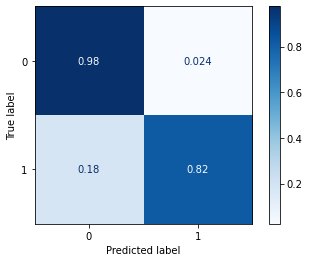

In [57]:
## knn
### default
knn = KNeighborsClassifier(n_jobs=-1)

start = time.time()
knn.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = knn.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['knn']['default']['time'] = time_taken
trunc_results['knn']['default']['f1'] = f1

plot_confusion_matrix(knn, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("KNN DEFAULT FINISH")

SVM DEFAULT FINISH


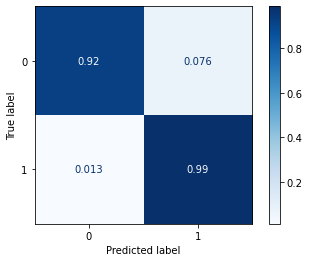

In [59]:
## SVM
### default
svm = LinearSVC(max_iter = 4000)

start = time.time()
svm.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = svm.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['svm']['default']['time'] = time_taken
trunc_results['svm']['default']['f1'] = f1

plot_confusion_matrix(svm, X_test, y_test['label'], normalize = "true", cmap = "Blues")
print("SVM DEFAULT FINISH")

LOGREG DEFAULT FINISH


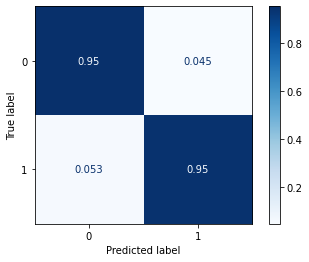

In [61]:
## Logistic Regression
### default
logreg = LogisticRegression(max_iter = 4000)

start = time.time()
logreg.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = logreg.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['logreg']['default']['time'] = time_taken
trunc_results['logreg']['default']['f1'] = f1

plot_confusion_matrix(logreg, X_test, y_test['label'], normalize = "true", cmap = "Blues")
plt.grid(False)

print("LOGREG DEFAULT FINISH")

DECTREE DEFAULT FINISH


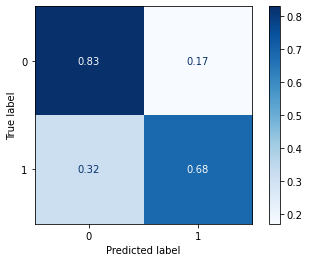

In [62]:
## Decision Tree
### default
decision_tree = DecisionTreeClassifier(random_state = 7)

start = time.time()
decision_tree.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = decision_tree.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['dectree']['default']['time'] = time_taken
trunc_results['dectree']['default']['f1'] = f1

plot_confusion_matrix(decision_tree, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("DECTREE DEFAULT FINISH")

In [65]:
trunc_results

{'nb': {'default': {'time': 0.682603120803833, 'f1': 0.862152609328436},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'svm': {'default': {'time': 7.438438177108765, 'f1': 0.9360163287039092},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'knn': {'default': {'time': 5.7668235301971436, 'f1': 0.9341689431678183},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'logreg': {'default': {'time': 3.481497287750244, 'f1': 0.9503782716977585},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'dectree': {'default': {'time': 92.95026516914368, 'f1': 0.7653888394958422},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'extratrees': {'default': {'time': 23.008014678955078,
   'f1': 0.9298673165448145},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'adb': {'default': {'time': 0, 'f1': 0},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}},
 'rf': {'default': {'time': 0, 'f1': 0},
  'tuned': {'time': 0, 'f1': 0, 'params': 0}}}

EXTRA TREES DEFAULT FINISH


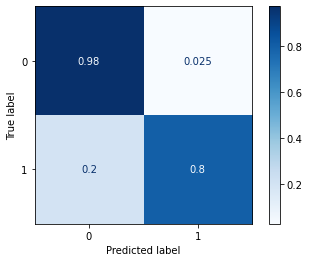

In [64]:
## Extra trees
### default
extra_trees = ExtraTreesClassifier(random_state = 7)

start = time.time()
extra_trees.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = extra_trees.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['extratrees']['default']['time'] = time_taken
trunc_results['extratrees']['default']['f1'] = f1

plot_confusion_matrix(extra_trees, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("EXTRA TREES DEFAULT FINISH")

ADB DEFAULT FINISH


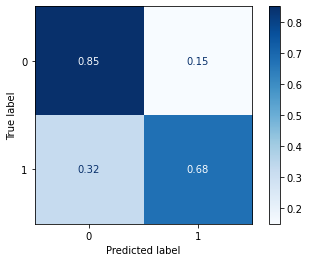

In [66]:
## Adaboost
### default
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

start = time.time()
adaboost.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = adaboost.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['adb']['default']['time'] = time_taken
trunc_results['adb']['default']['f1'] = f1

plot_confusion_matrix(adaboost, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("ADB DEFAULT FINISH")

RANDOM FORESTS DEFAULT FINISH


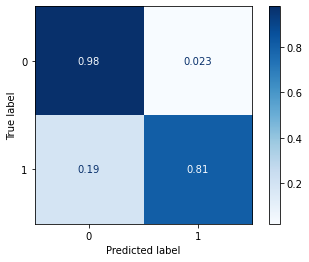

In [67]:
## Random forests
### default
random_forests = RandomForestClassifier(random_state=7)

start = time.time()
random_forests.fit(word2vec_text_df, y_train['label'])
time_taken = time.time() - start

y_pred = random_forests.predict(X_test)

f1 = fbeta_score(y_test['label'], y_pred, beta = 0.5)

trunc_results['rf']['default']['time'] = time_taken
trunc_results['rf']['default']['f1'] = f1

plot_confusion_matrix(random_forests, X_test, y_test['label'], normalize = "true", cmap = "Blues")

print("RANDOM FORESTS DEFAULT FINISH")